# <font color="blue"> Coffee Rosating Neural Network using Numpy </font>

In [8]:
# Importing Depndenncy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./Materials_By_Deeplearning/deeplearning.mplstyle')
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [9]:
# DataSet Loading
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

x_train,y_train = load_coffee_data()
# print("x_train\n",x_train)
# print("\ny_train\n",y_train)

print(x_train.shape)
print(y_train.shape)

(200, 2)
(200, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

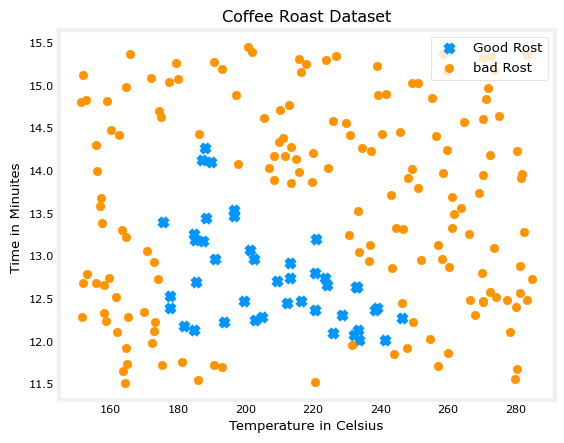

In [13]:
# Let's PLot the graph
ytrain = y_train.reshape(-1)
pos = ytrain==1
neg = ytrain==0

_,ax=plt.subplots(1,1)
ax.scatter(x_train[pos,0], x_train[pos,1], marker='x',label="Good Rost")
ax.scatter(x_train[neg,0],x_train[neg,1], marker='o', label="bad Rost")
ax.set_title('Coffee Roast Dataset')
ax.set_xlabel('Temperature in Celsius')
ax.set_ylabel('Time in Minuites ')
ax.legend(loc="upper right",fontsize='large')
plt.show

In [16]:
# Normalizing the data
print("Data Befor the normalization")
print(f"    Temperature      Max = {np.max(x_train[:,0]):0.2f}        Min = {np.min(x_train[:,0]):0.2f}")
print(f"    Time             Max = {np.max(x_train[:,1]):0.2f}        Min = {np.min(x_train[:,1]):0.2f}")

normal = tf.keras.layers.Normalization(axis=-1)
normal.adapt(x_train)
x_nor_data = normal(x_train)


print("\nData after the normalization")
print(f"    Temperature      Max = {np.max(x_nor_data[:,0]):0.2f}        Min = {np.min(x_nor_data[:,0]):0.2f}")
print(f"    Time             Max = {np.max(x_nor_data[:,1]):0.2f}        Min = {np.min(x_nor_data[:,1]):0.2f}")

Data Befor the normalization
    Temperature      Max = 284.99        Min = 151.32
    Time             Max = 15.45        Min = 11.51

Data after the normalization
    Temperature      Max = 1.66        Min = -1.69
    Time             Max = 1.79        Min = -1.70


In [30]:
# Now let's implement the neural network with numpy

def sigmoid(z):
    return (1/(1+np.exp(-z)))

def Dense (a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range (units):
        w = W[:,i]
        z = np.dot(w, a_in)+b[i]
        a_out[i] = sigmoid(z)
    
    return(a_out)

def sequential(x,W1,b1,w2,b2):

    a1 = Dense(x,w1,b1)
    a2 = Dense(a1,w2,b2)
    
    return a2
        
     


We can copy trained weights and biases from the previous lab in Tensorflow.

In [21]:
w1 = np.array([[-4.35028784e-03,1.33250771e+01,1.45523815e+01], [ 1.10366945e+01,1.10345125e+01,3.54273051e-01]])
b1 = np.array([13.437711,1.3518897,15.181887 ])

w2 = np.array([[ 27.743904],[-37.42487 ],[ 27.908054]])
b2 = np.array([-36.27942])


### Predictions

Once you have a trained model, you can then use it to make predictions. Recall that the output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

In [28]:
def Pridection(X , w1, b1, w2, b2):
    Size_of_data = X.shape[0]
    pridection = np.zeros((Size_of_data,1))
    for i in range (Size_of_data):
        pridection[i,0] = sequential(X[i], w1, b1, w2, b2)
    return pridection

In [39]:
# let's text the model made using numpy
x_test = np.array([
    [200,13.9], #perfect roast 
    [200,17]  # inperfect roast
])

x_nor_test = normal(x_test)
pri =  Pridection (x_nor_test,w1,b1,w2,b2)
print(pri)
print("\nShape of pridection array is ",pri.shape)

[[9.64074550e-01]
 [1.44234342e-08]]

Shape of pridection array is  (2, 1)


In [36]:
# now we got the pridection so using threshold value to define 1 or 0
def Binary_Pridection(X , w1, b1, w2, b2):
    pri = Pridection(X , w1, b1, w2, b2)
    for i in range (pri.shape[0]):
        val = pri[i,0]
        if val >= 0.5:
            pri[i,0] = 1
        else:
            pri[i,0] = 0
    return pri

pri =  Binary_Pridection(x_nor_test,w1,b1,w2,b2)
print(pri)

[[1.]
 [0.]]


So now we have sucesfully made a nural network using numpy